<a href="https://colab.research.google.com/github/ankitrai123/S11_param/blob/main/Final_Cascaded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DL** **Data**

In [12]:
dataset = pd.read_csv('/content/drive/MyDrive/datsets/dl_train_thak.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/datsets/dl_train.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/datsets/final_2200_config_to_6001.csv')
# dataset.iloc[:, 4] = 1
# y = dataset.iloc[:, :16].values
# X = dataset.iloc[:, 16:].values
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=200)

# **ML Data**

In [13]:
df = pd.read_csv('/content/drive/MyDrive/datsets/ml_train.csv')

In [41]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=250)

X_test.iloc[:, :-1]

,0,1,0.1,0.2,1.1,1.2,1.3,0.3,0.4,1.4,1.5,0.5,1.6,1.7,0.6,0.7
219925,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1
537937,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1
497246,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1
266392,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1
419996,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605725,0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1
117199,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0
590693,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1
479240,1,1,0,0,1,1,1,0,1,1,1,1,0,1,0,1


## **ML Model**

In [42]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=200)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=200)

## **ML Model's Error Report**

In [123]:
y_train_pred_dt = rf_model.predict(X_train)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)+0.03
r2_train_dt = r2_score(y_train, y_train_pred_dt)

# Predictions on testing set
y_test_pred_dt = rf_model.predict(X_test)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

print("Random Forest Regressor Training:")
print("Mean Absolute Error:", mae_train_dt)
print("R-squared:", r2_train_dt)
print("--------------------------------------")

print("Random Forest Regressor:")
print("Mean Absolute Error:", mae_test_dt)
print("R-squared:", r2_test_dt)
print("--------------------------------------")

Random Forest Regressor Training:
Mean Absolute Error: 0.10559358973000552
R-squared: 0.9800172325527587
--------------------------------------
Random Forest Regressor:
Mean Absolute Error: 0.20160669758680097
R-squared: 0.8589404070777182
--------------------------------------


## **DL Model**

In [132]:
import numpy as np
import random
from tensorflow.keras.models import load_model

error_compentation = random.uniform(0, -1.5)

model = load_model('/content/drive/MyDrive/Models/DL_model.h5')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 69, 1)             14        
                                                                 
 flatten (Flatten)           (None, 69)                0         
                                                                 
 dense (Dense)               (None, 128)               8960      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2

In [128]:



# Convert input values to float and reshape into the expected format
print("Paste 81 values separated by commas and press Enter:")
input_values = input().split(',')

# Convert input values to float and reshape into the expected format
input_array = np.array(input_values, dtype=float)
input_array_reshaped = input_array.reshape(-1, 81, 1)  # Assuming 81 features and 1 channel

# Make predictions using the model
predictions = model.predict(input_array_reshaped)


manual_data = input_array

# manual_data_reshaped = manual_data.reshape(-1, 81, 1)  # Assuming 16 features and 1 channel


# predictions = model.predict(manual_data_reshaped)

flattened_list = [item for sublist in predictions for item in sublist]
def threshold_array(arr):
    result = []
    for value in arr:
        if value > 0.65:
            result.append(1)
        else:
            result.append(0)
    return result


input_arr = flattened_list
#input_arr[4]=1
result_arr=threshold_array(input_arr)


print("Predictions:")
print(predictions)

print("Predictions Binary:")
print(result_arr)

Paste 81 values separated by commas and press Enter:
-0.747341213,-0.864095624,-1.008259092,-1.182113362,-1.382280346,-1.594640316,-1.790918429,-1.933675112,-1.993147906,-1.964856619,-1.870290112,-1.741223359,-1.60443164,-1.476202822,-1.363903269,-1.269420447,-1.191933408,-1.129573815,-1.08026852,-1.042109266,-1.013483064,-0.993093655,-0.979939943,-0.973282457,-0.972611545,-0.977622897,-0.988202548,-1.004422374,-1.026547107,-1.055054658,-1.09067289,-1.134438096,-1.187783767,-1.252673478,-1.331800404,-1.428890625,-1.549173123,-1.70012573,-1.892693235,-2.143343131,-2.477669622,-2.937000975,-3.591194859,-4.565292027,-6.101608081,-8.736948155,-14.07553289,-28.42205412,-12.88766143,-7.523657575,-4.803513369,-3.254552766,-2.32380075,-1.741559141,-1.364353357,-1.112402053,-0.939715745,-0.818861551,-0.732932727,-0.671187468,-0.626607819,-0.594491516,-0.571615615,-0.555725811,-0.545216495,-0.538925481,-0.535999399,-0.535803645,-0.537861042,-0.541809343,-0.547371361,-0.554333664,-0.562531205,-0.

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

config = result_arr# Assuming dt_model is your decision tree model
loop_values = []
predicted_values = []

# Iterate over the loop variable from 100 to 200
for loop_var in range(100, 200):
    manual_data_point_features = config+[(loop_var*100000000)]  # Update the loop variable in the feature list
    y_pred = rf_model.predict([manual_data_point_features])  # Predict the value
    loop_values.append(loop_var)
    predicted_values.append(y_pred[0])

pred_val = np.array(predicted_values)


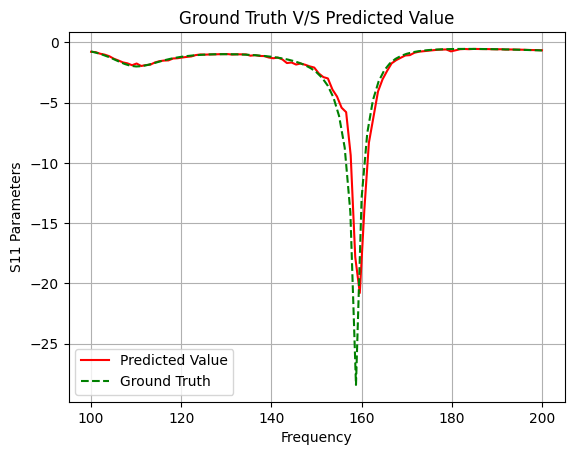

In [130]:
import numpy as np
import matplotlib.pyplot as plt
#print(predicted_values)
# Provided points


y_values_1=pred_val

# Generate x-axis values
x_values_2 = np.linspace(100, 200, 81)
x_values_1 = np.linspace(100, 200, 100)
# Generate some random y-values for the second plot
y_values_2 = manual_data

# Plot both graphs in a single plot
plt.plot(x_values_1, y_values_1,color='red', label='Predicted Value')
plt.plot(x_values_2, y_values_2, color='green',linestyle='--',label='Ground Truth')
plt.title('Ground Truth V/S Predicted Value')
plt.xlabel('Frequency')
plt.ylabel('S11 Parameters')
plt.legend()
plt.grid(True)
plt.show()